# CSCI405: Artificial Intelligence
## Module 2
## Assignment: Multiple Linear Regression

#### Name:

The purpose of this assignment is to hone your matplotlib skills, and expose you to an elementary multiple linear regression problem. 

The provided data has been generated from a simple linear model, but some random noise has been added. Your goal is to perform multivariate ordinary least squares linear regression to determine the Best Linear Unbiased Estimators (BLUE) for the model (that is, you must calculate the model parameters for a linear regression model).  There will be some irreducible error due to the noise that was injected into the data, therefore we will never be able to exactly recover the "true model parameters".  However, the optimal model parameters computed via the linear regression analysis are sufficiently accurate that you will be able to infer the true model parameters for yourslef!

Here are the steps you will take:

1. Create the following figure using matplotlib, which plots the data from the file called `MultipleLinearRegressionData.csv`.
2. Perform linear regression to calculate the optimal ordinary least squares regression model parameters.
3. Recreate the first figure by adding the best fit curve to all subplots.
4. Infer the true model parameters.

Below is the first figure you must emulate:

<img src="LinearDataPlot.png" width ="800" />

Below is the second figure you must emulate:

<img src="LinearDataPlot_Curve.png" width ="800" />

Each of the two figures has four subplots.  Note the various viewing angles that each subplot presents - you can achieve this with the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) method. Use the same color scheme for the datapoints shown here, which is called `jet`.  Be sure to label your axes as shown.

In [1]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
import os
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Import Data

Begin by importing the data from the file called `MultipleLinearRegression.csv`.

In [2]:
import pandas as pd

fileName = "MultipleLinearRegression.csv"

# Read in Data
multiLinearReg_df = pd.read_csv("MultipleLinearRegression.csv")
multiLinearReg_df

,x,y,z
0,8.340440,9.588740,209.008524
1,14.406490,13.648816,325.449818
2,0.002287,0.590582,1.651778
3,6.046651,6.393511,141.464904
4,2.935118,4.302151,83.204506
...,...,...,...
70,18.068038,16.252976,396.115249
71,2.749494,3.433744,68.351161
72,2.785527,2.817559,58.948555
73,16.147826,16.344096,382.447605


# Create First Image 

Use the [scatter3D](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) to plot in three dimensions.  Create four [subplots](https://matplotlib.org/3.1.0/gallery/recipes/create_subplots.html) with the appropriate viewing angles using the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) function.

Saving figure LinearDataPlot


<function matplotlib.pyplot.show(*args, **kw)>

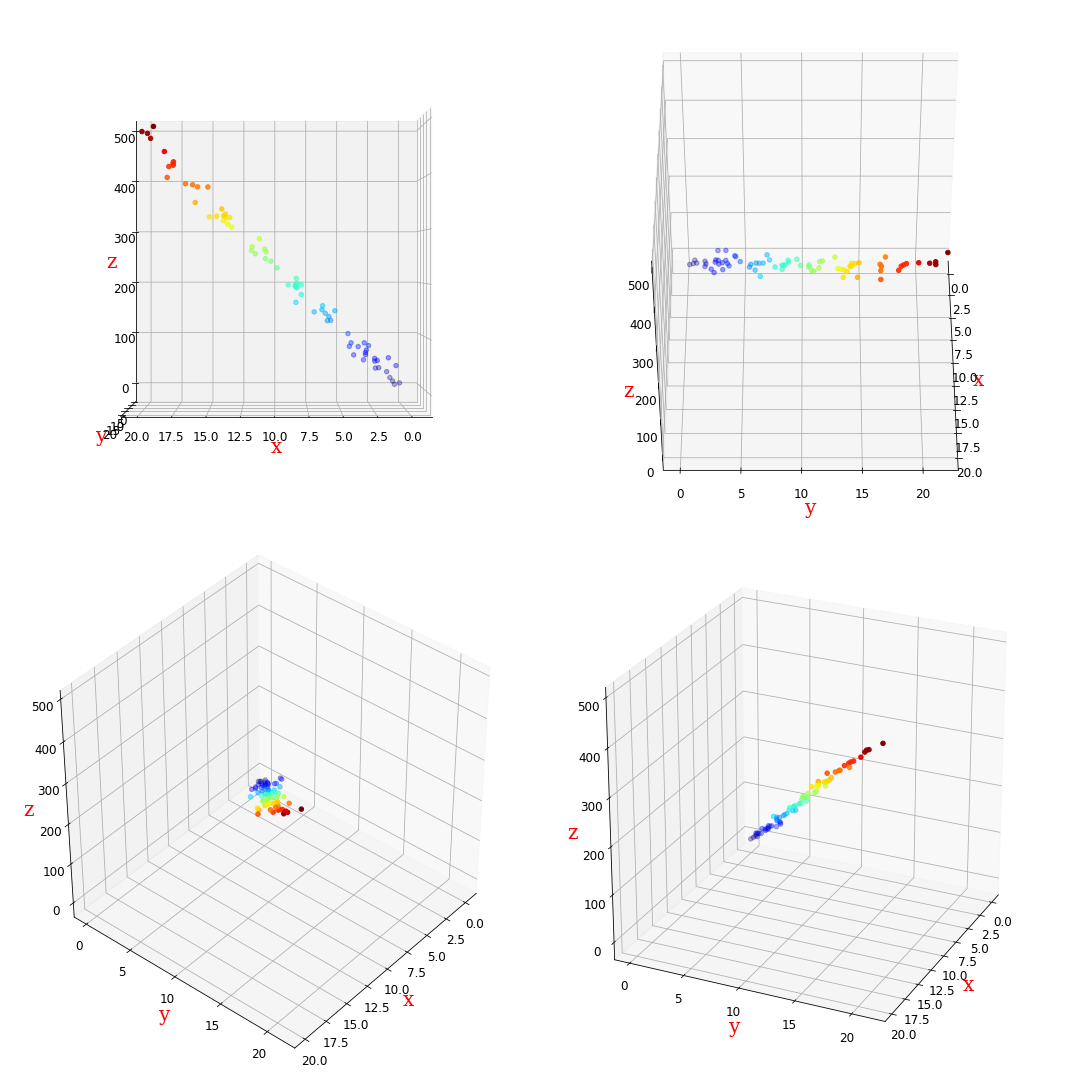

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

#Creation of Overall Plot 
plot = plt.figure( )

# Font for the x,y, and z labels 
sub_Font = {"family":"serif", "color":"red", "weight":"normal", "size":20}
x = multiLinearReg_df["x"]
y = multiLinearReg_df["y"]
z = multiLinearReg_df["z"]

### ------------------------------------------- SUBPLOT ONE --------------------------------------------------------- ###

# Creation of first 3D Scatter subplot
sub1 = plot.add_subplot(2,2,1, projection = '3d')
sub1.scatter3D(x, y, z, c=z, cmap = "jet")

#Subplot 1 axis labels 
sub1.set_xlabel("x", fontdict = sub_Font)
sub1.set_ylabel("y", fontdict = sub_Font)
sub1.set_zlabel("z", fontdict = sub_Font)

# Sub plots views
sub1.view_init(0, 90)




### ------------------------------------------- SUBPLOT TWO --------------------------------------------------------- ###

# Creation of first 3D Scatter subplot
sub2 = plot.add_subplot(2,2,2, projection = '3d')
sub2.scatter3D(x, y, z, c=z, cmap = "jet")

#Subplot 1 axis labels 
sub2.set_xlabel("x", fontdict = sub_Font)
sub2.set_ylabel("y", fontdict = sub_Font)
sub2.set_zlabel("z", fontdict = sub_Font)

# Sub plots views
sub2.view_init(45, 0)

### ------------------------------------------- SUBPLOT THREE --------------------------------------------------------- ###

# Creation of first 3D Scatter subplot
sub3 = plot.add_subplot(2,2,3, projection = '3d')
sub3.scatter3D(x, y, z, c=z, cmap = "jet")

#Subplot 1 axis labels 
sub3.set_xlabel("x", fontdict = sub_Font)
sub3.set_ylabel("y", fontdict = sub_Font)
sub3.set_zlabel("z", fontdict = sub_Font)

# Sub plots views
sub3.view_init(40, 40)

### ------------------------------------------- SUBPLOT FOUR --------------------------------------------------------- ###

# Creation of first 3D Scatter subplot
sub4 = plot.add_subplot(2,2,4, projection = '3d')
sub4.scatter3D(x, y, z, c=z, cmap = "jet")

#Subplot 1 axis labels 
sub4.set_xlabel("x", fontdict = sub_Font)
sub4.set_ylabel("y", fontdict = sub_Font)
sub4.set_zlabel("z", fontdict = sub_Font)

# Sub plots views
sub4.view_init(25, 25)

# Shows subplots
plt.tight_layout(pad = 0.0, w_pad = 0.0, h_pad = 0.0)
save_fig("LinearDataPlot")
plt.show



# Train Linear Regression Model

From the `sklearn.linear_model` library, import the `LinearRegression` class.  Instantiate an object of this class called `model`, and fit it to the data. The `x` and `y` coordinates will be your features and `z` will be your response. 

Print the optimal model parameters to the screen by completing the following `print()` statements.

**Note:** Since we are not concerned with generalization error in this assignment, we will not split our data into training and test sets. In 'real-world' projects, you would want to split your data to see how your model performs with data that it has never seen before.

In [4]:
train = pd.DataFrame({'x_data': x, 'y_data': y})

# Importation of  LinearRegression class from the sklearn.linear_model library.
from sklearn.linear_model import LinearRegression

# Instantiate an object of this class called model
model = LinearRegression(fit_intercept = True)
model.fit(train, z)

# Outputting Model Coefficients and Intercept 
print("Model Coefficients: ", model.coef_)
print("Model Intercept : ", model.intercept_)

Model Coefficients:  [ 8.02602396 15.95639323]
Model Intercept :  -8.632876775060794


# Create Second Image

Now that we have fit our model, which means that we have computed the optimal model parameters, we can use our model to plot the regression line for the data.  Below, I supply you with `x_fit` and `y_fit` that represent the x- and y-data of the regression line, respectively.  All we need to do next is ask the model to predict a `z_fit` value for each `x_fit` and `y_fit` pair by invoking the model's `predict()` method.  This should make sense when you consider the ordinary least squares linear regression equation for calculating `z_fit`:

$$ z_{fit} = \hat{\theta}_0 + \hat{\theta}_1 x_{fit} + \hat{\theta}_2 y_{fit} $$

where $ \hat{\theta}_i $ are the computed model parameters.  You must use `x_fit` and `y_fit` as features to be passed to the model's `predict()` method, which will return `z_fit` as determined by the above equation.  Once you obtain `z_fit`, you are ready to plot the regression line by plotting it against `x_fit` and `y_fit`.

In [10]:
# Plot Curve Fit
x_fit = np.linspace(0,21,1000)
y_fit = x_fit

# Creating df
df = pd.DataFrame({'x_data': x_fit, 'y_data': y_fit})

# Using predict func 
z_fit = model.predict(df)

Recreate the first image, but plot the line of best fit in each of the subplots as well.

In [13]:
### ------------------------------------------- SUBPLOT ONE --------------------------------------------------------- ###

# Creation of first 3D Scatter subplot
sub1 = plot.add_subplot(2,2,1, projection = '3d')
sub1.scatter3D(x, y, z, c=z, cmap = "jet")

#Subplot 1 axis labels 
sub1.set_xlabel("x", fontdict = sub_Font)
sub1.set_ylabel("y", fontdict = sub_Font)
sub1.set_zlabel("z", fontdict = sub_Font)

# Sub plots views
sub1.view_init(0, 90)

# Subplot Line
sub1.plot3D(x_fit, y_fit, z_fit, "-k")



### ------------------------------------------- SUBPLOT TWO --------------------------------------------------------- ###

# Creation of first 3D Scatter subplot
sub2 = plot.add_subplot(2,2,2, projection = '3d')
sub2.scatter3D(x, y, z, c=z, cmap = "jet")

#Subplot 1 axis labels 
sub2.set_xlabel("x", fontdict = sub_Font)
sub2.set_ylabel("y", fontdict = sub_Font)
sub2.set_zlabel("z", fontdict = sub_Font)

# Sub plots views
sub2.view_init(45, 0)

# Subplot Line
sub2.plot3D(x_fit, y_fit, z_fit, "-k")

### ------------------------------------------- SUBPLOT THREE --------------------------------------------------------- ###

# Creation of first 3D Scatter subplot
sub3 = plot.add_subplot(2,2,3, projection = '3d')
sub3.scatter3D(x, y, z, c=z, cmap = "jet")

#Subplot 1 axis labels 
sub3.set_xlabel("x", fontdict = sub_Font)
sub3.set_ylabel("y", fontdict = sub_Font)
sub3.set_zlabel("z", fontdict = sub_Font)

# Sub plots views
sub3.view_init(40, 40)

# Subplot Line
sub3.plot3D(x_fit, y_fit, z_fit, "-k")

### ------------------------------------------- SUBPLOT FOUR --------------------------------------------------------- ###

# Creation of first 3D Scatter subplot
sub4 = plot.add_subplot(2,2,4, projection = '3d')
sub4.scatter3D(x, y, z, c=z, cmap = "jet")

#Subplot 1 axis labels 
sub4.set_xlabel("x", fontdict = sub_Font)
sub4.set_ylabel("y", fontdict = sub_Font)
sub4.set_zlabel("z", fontdict = sub_Font)

# Sub plots views
sub4.view_init(25, 25)

# Subplot Line
sub4.plot3D(x_fit, y_fit, z_fit, "-k")

# Shows subplots
plt.tight_layout(pad = 0.0, w_pad = 0.0, h_pad = 0.0)
save_fig("LinearDataPlot_Curve")
plt.show


Saving figure LinearDataPlot_Curve


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

# Infer the True Model Parameters

I defined the equation of a line plus a random Gaussian noise term in order to generate this data - this is the "true" model (minus the noise term). You took that noisy data and performed a regression analysis to obtain estimates of the "true" model parameters. The noise in the data prevents you from computing those "true" model parameters exactly - there is some irreducible error. Instead, the linear regression model only gives you the Best Linear Unbiased Estimators (BLUE) for the "true" model parameters. 

The true model parameters that I selected are <b>integer values</b>. Given this information, you must look at the model coefficients that the regression algorithm computed, and infer what the true model parameters are. You may "hard-code" these values into the below print statements.

In [7]:
# Rounded coef. and inter.
coefficients = [8, 16] 
intercept = - 9

print("True Model Coefficients: ", coefficients)
print("True Model Intercept : ", intercept)

True Model Coefficients:  [8, 16]
True Model Intercept :  -9
